In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
dfx = pd.read_csv("Training Data (classify points nn)/Logistic_X_Train.csv")
dfy = pd.read_csv("Training Data (classify points nn)/Logistic_Y_Train.csv")

In [3]:
dfx.head(n=5)

,f1,f2
0,0.574727,0.787277
1,0.251502,0.908940
2,1.860578,0.013763
3,0.019477,1.047210
4,0.029794,0.252236


In [4]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 2 columns):
f1    2250 non-null float64
f2    2250 non-null float64
dtypes: float64(2)
memory usage: 35.3 KB


In [5]:
dfy.head(n=5)

,label
0,0
1,0
2,1
3,0
4,1


# Data Preparation and Visualization

In [6]:
x_train = np.array(dfx)
y_train = np.array(dfy)

In [7]:
print(x_train.shape,y_train.shape)

(2250, 2) (2250, 1)


In [8]:
print(y_train)

[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


In [9]:
y_train = y_train.reshape((2250,))

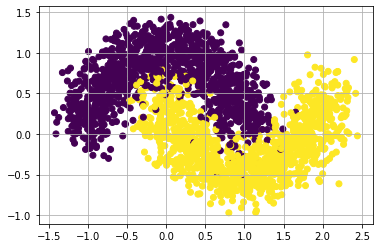

In [10]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.grid()
plt.show()

# Training the model

In [25]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(2,)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [29]:
hist = model.fit(x_train,y_train,shuffle=True,batch_size = 100, epochs = 15)

Epoch 1/15
2250/2250 [==============================] - 0s 30us/step - loss: 0.1529 - accuracy: 0.9400
Epoch 2/15
2250/2250 [==============================] - 0s 31us/step - loss: 0.1267 - accuracy: 0.9538
Epoch 3/15
2250/2250 [==============================] - 0s 36us/step - loss: 0.1112 - accuracy: 0.9578
Epoch 4/15
2250/2250 [==============================] - 0s 34us/step - loss: 0.1028 - accuracy: 0.9653
Epoch 5/15
2250/2250 [==============================] - 0s 32us/step - loss: 0.1011 - accuracy: 0.9644
Epoch 6/15
2250/2250 [==============================] - 0s 31us/step - loss: 0.1041 - accuracy: 0.9591
Epoch 7/15
2250/2250 [==============================] - 0s 37us/step - loss: 0.0947 - accuracy: 0.9667
Epoch 8/15
2250/2250 [==============================] - 0s 41us/step - loss: 0.0934 - accuracy: 0.9662
Epoch 9/15
2250/2250 [==============================] - 0s 35us/step - loss: 0.0936 - accuracy: 0.9662
Epoch 10/15
2250/2250 [==============================] - 0s 37us/step - l

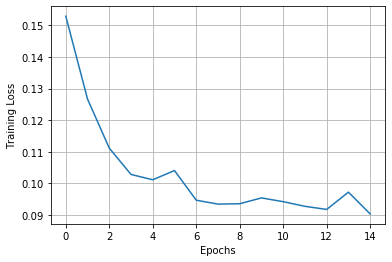

In [30]:
h = hist.history
plt.plot(h['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.grid()
plt.show()

In [15]:
df = pd.read_csv("Test Cases(classify points nn)/Logistic_X_test.csv")

In [16]:
x_test = np.array(df)

In [17]:
print(x_test.shape)

(750, 2)


In [31]:
pred = model.predict(x_test)

In [32]:
print(pred)

[[1.91303567e-04]
 [1.73986300e-05]
 [9.60230827e-01]
 [7.10348366e-04]
 [9.92483795e-01]
 [8.59741867e-03]
 [1.01687703e-02]
 [3.51168965e-05]
 [9.98492956e-01]
 [4.58454061e-03]
 [8.97688091e-01]
 [9.93500531e-01]
 [3.49323236e-05]
 [9.99523640e-01]
 [3.59752148e-01]
 [9.65059280e-01]
 [3.70121934e-02]
 [4.03950035e-05]
 [9.92577016e-01]
 [5.66557329e-03]
 [8.35008279e-04]
 [9.98851776e-01]
 [9.99998450e-01]
 [1.07505056e-03]
 [9.99397397e-01]
 [5.38111618e-03]
 [1.43371217e-05]
 [7.22212717e-05]
 [3.12692702e-01]
 [2.27142149e-03]
 [9.93525147e-01]
 [3.80649499e-06]
 [9.99076724e-01]
 [3.43581587e-02]
 [4.71089268e-04]
 [9.88704979e-01]
 [9.83022630e-01]
 [1.79573397e-06]
 [3.83809255e-03]
 [9.99441445e-01]
 [4.69161689e-01]
 [9.43619847e-01]
 [7.77140120e-03]
 [9.99953151e-01]
 [6.56648695e-01]
 [1.53930392e-03]
 [9.98670936e-01]
 [9.76392269e-01]
 [5.01420891e-06]
 [7.39040911e-01]
 [9.99009013e-01]
 [8.88064280e-02]
 [9.75232184e-01]
 [9.68010426e-01]
 [9.99657869e-01]
 [9.506762

In [33]:
for i in range(pred.shape[0]):
    if pred[i] >=0.5:
        pred[i] =1
    else:
        pred[i] =0
pred = pred.reshape((750,))
print(pred)
    

[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
pred=le.fit_transform(pred)
pred=pd.DataFrame(pred,columns=["label"])
pred.to_csv("Classify_points.csv",index=True)